Mounting the Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive


Installing the statsmodel library

In [ ]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 4.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.0 MB/s 


Importing all the Libraries


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

Reading the train and test Dataset and converting the Year column to date_time format

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/training.csv', encoding='latin1')
data.year = pd.to_datetime(data.year, format='%Y')
test_data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/testing.csv', encoding='latin1')
test_data.year = pd.to_datetime(test_data.year, format='%Y')

Extracting relevant columns for Training and Prediction

In [ ]:
X = data[["year", "Next_Year_Crime_Rate"]]
X = X.set_index('year')
X.head()
#X.year = X.year.astype(int)

,Next_Year_Crime_Rate
year,
1980-01-01,16.487810
1981-01-01,16.681272
1982-01-01,15.150988
1983-01-01,10.122600
1984-01-01,9.389760


Visualizing the train dataset

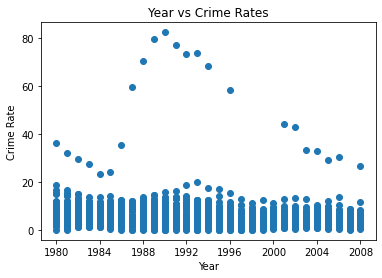

In [ ]:
plt.scatter(X.index, X.Next_Year_Crime_Rate, cmap='plasma')
plt.title('Year vs Crime Rates')

plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.show()

In [ ]:
X_test = test_data[["year", "Next_Year_Crime_Rate"]]
X_test = X_test.set_index('year')

Visualizing the test dataset


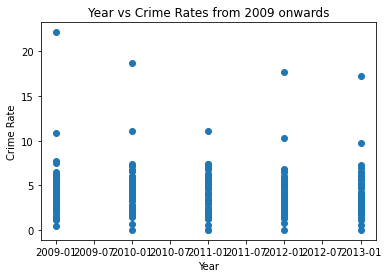

In [ ]:
plt.scatter(X_test.index, X_test.Next_Year_Crime_Rate, cmap='plasma')
plt.title('Year vs Crime Rates from 2009 onwards')

plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.show()

Creating array values of the dataset

In [ ]:
data = X.values
test_data = X_test.values

In [ ]:
train_set = len(data)
test_set = len(test_data)
train_set_dates = X.head(train_set).index  # for plotting
test_set_dates = X_test.head(test_set).index  

Plotting the training and testing dataset

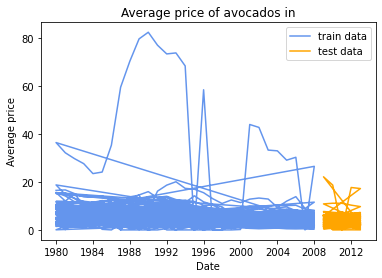

In [ ]:
plt.plot(train_set_dates, X, color='cornflowerblue', label='train data')
plt.plot(test_set_dates, X_test, color='orange', label='test data')
plt.legend(loc='best')
plt.title(f'Average price of avocados in')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.show()

Applying Autoregressive method to the training dataset

In [ ]:
model = AutoReg(data, lags=50)  
trained_model = model.fit()

Prediciting the results and calculating the error-rate


In [ ]:
from sklearn.metrics import mean_squared_error as mse

predictions = trained_model.predict(start=train_set, 
                                    end=train_set + test_set - 1)

error = mse(test_data, predictions)

print(f'test MSE: {error:.3}')
print(f'test RMSE: {error ** 0.5:.3}')

test MSE: 10.9
test RMSE: 3.3


Plotting the Test set results

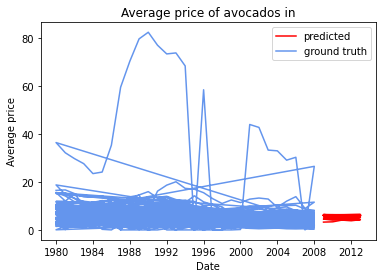

In [ ]:
plt.plot(test_set_dates, predictions, color='red', label='predicted')
plt.plot(X.index, X.Next_Year_Crime_Rate, color='cornflowerblue', 
         label='ground truth')
#plt.plot(test_set_dates, X_test, color='yellow', label='test data')

plt.legend(loc='best')
plt.title(f'Average price of avocados in')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.show()

In [ ]:
model = SimpleExpSmoothing(np.asarray(X['Next_Year_Crime_Rate']))

For alpha = 0.10,  RMSE is 3.0277


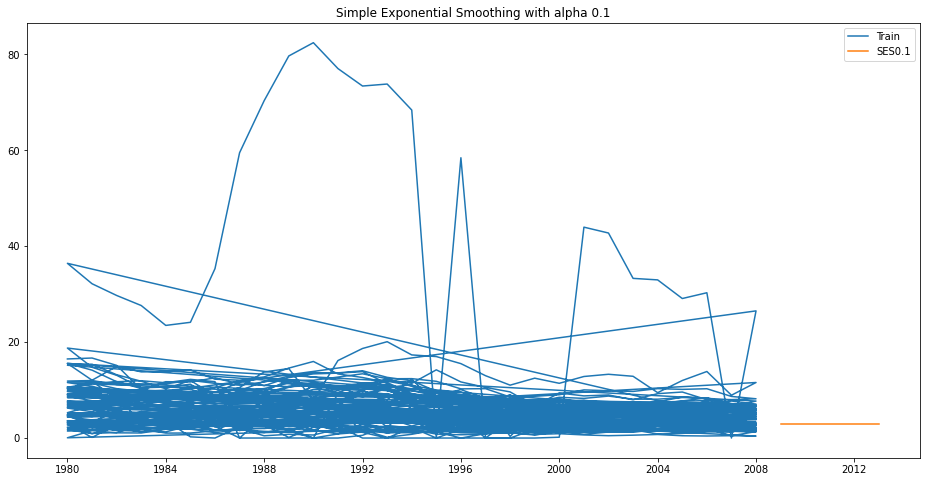

For alpha = 0.50,  RMSE is 3.4060


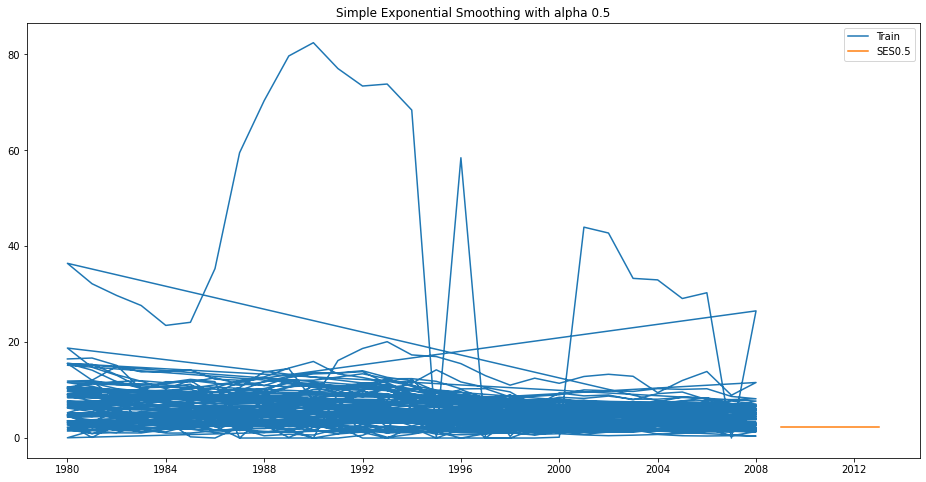

For alpha = 0.99,  RMSE is 3.4705


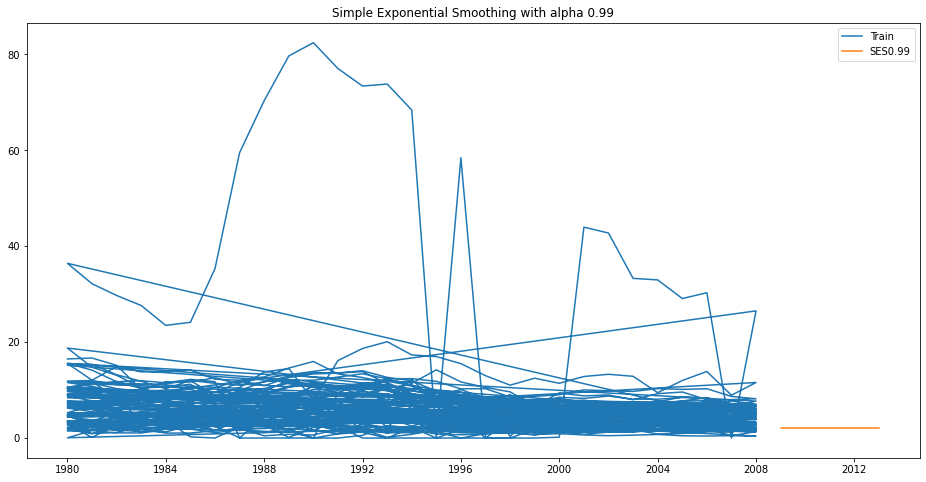

In [ ]:
alpha_list = [0.1, 0.5, 0.99]

pred_SES = X_test.copy() # Have a copy of the test dataset

for alpha_value in alpha_list:

    alpha_str =  "SES" + str(alpha_value)
    mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
    pred_SES[alpha_str]  =  mode_fit_i.forecast(len(X_test['Next_Year_Crime_Rate']))
    rmse =  np.sqrt(mean_squared_error(X_test['Next_Year_Crime_Rate'], pred_SES[alpha_str]))
###
    print("For alpha = %1.2f,  RMSE is %3.4f" %(alpha_value, rmse))
    plt.figure(figsize=(16,8))
    plt.plot(X.index, X['Next_Year_Crime_Rate'], label ='Train')
    #plt.plot(X_test.index, X_test['Next_Year_Crime_Rate'], label  ='Test')
    plt.plot(X_test.index, pred_SES[alpha_str], label  = alpha_str)
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
    plt.legend(loc='best') 
    plt.show()

In [ ]:
model = auto_arima(X, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(X)
forecast = model.predict(n_periods=len(X_test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7857.073, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8145.996, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7892.167, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7944.840, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8144.006, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7876.393, Time=0.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7890.828, Time=0.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7858.748, Time=1.89 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7858.942, Time=2.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7892.749, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7858.688, Time=1.09 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.47 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=7855.094, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7

In [ ]:
from math import sqrt
rms = sqrt(mean_squared_error(X_test,forecast))
print("RMSE: ", rms)

RMSE:  3.508574976638257


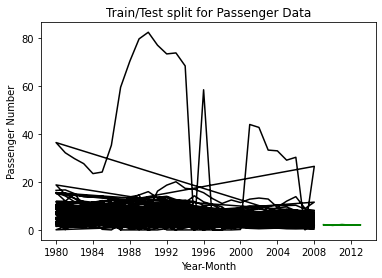

In [ ]:
plt.plot(X.index, X, color = "black")
#plt.plot(X_test.index, X_test, color = "red")
plt.plot(X_test.index, forecast, color = "green")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
plt.show()

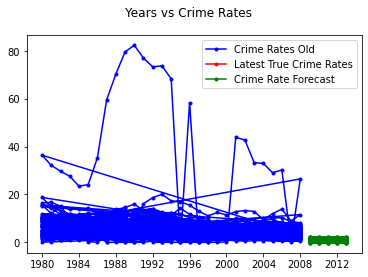

In [ ]:
#create an out of sample forcast for the next 255 steps beyond the final data point in the training data set
sales_forecast = fitted.forecast(steps=255)

fig = plt.figure()
fig.suptitle('Years vs Crime Rates')
past, = plt.plot(X.index, X, 'b.-', label='Crime Rates Old')
#future, = plt.plot(X_test.index, X_test, 'r.-', label='Latest True Crime Rates')
predicted_future, = plt.plot(X_test.index, sales_forecast, 'g.-', label='Crime Rate Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse

predictions = fitted.predict(start=train_set, 
                                    end=train_set + test_set - 1)

error = mse(test_data, predictions)

print(f'test MSE: {error:.3}')
print(f'test RMSE: {error ** 0.5:.3}')

test MSE: 18.2
test RMSE: 4.26


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
